In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

In [7]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
df.shape

(200, 4)

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


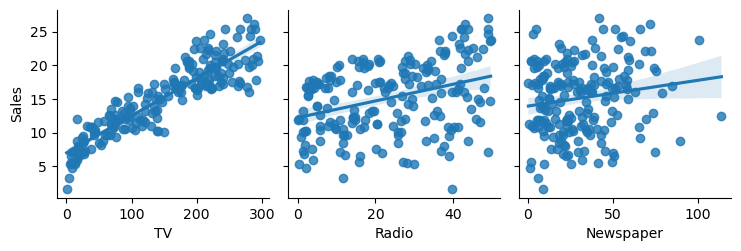

In [17]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

<Axes: ylabel='Frequency'>

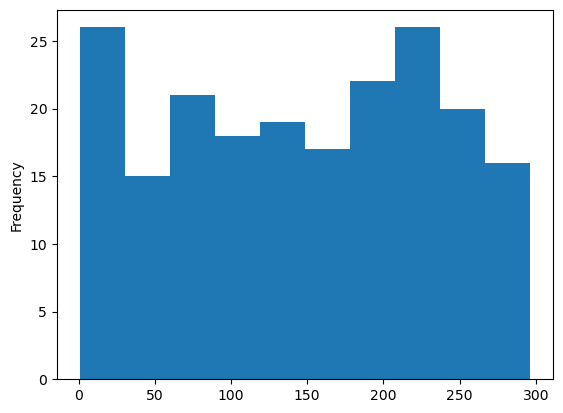

In [20]:
df['TV'].plot.hist(bins=10)

<Axes: xlabel='Radio', ylabel='Frequency'>

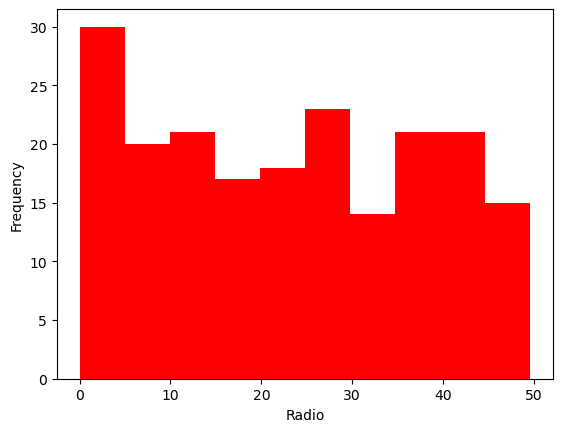

In [22]:
df['Radio'].plot.hist(bins=10,color="red", xlabel="Radio")

<Axes: xlabel='Radio', ylabel='Frequency'>

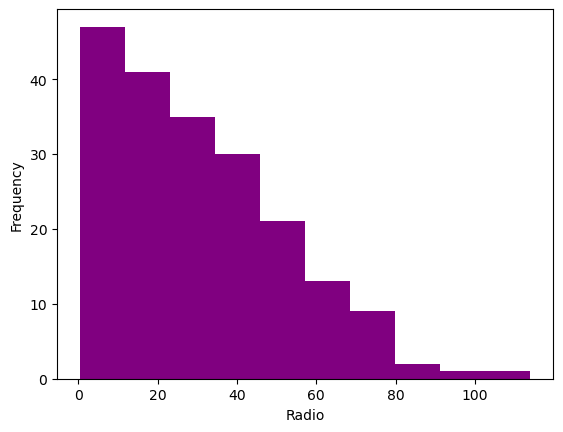

In [24]:
df['Newspaper'].plot.hist(bins=10,color="purple", xlabel="Radio")

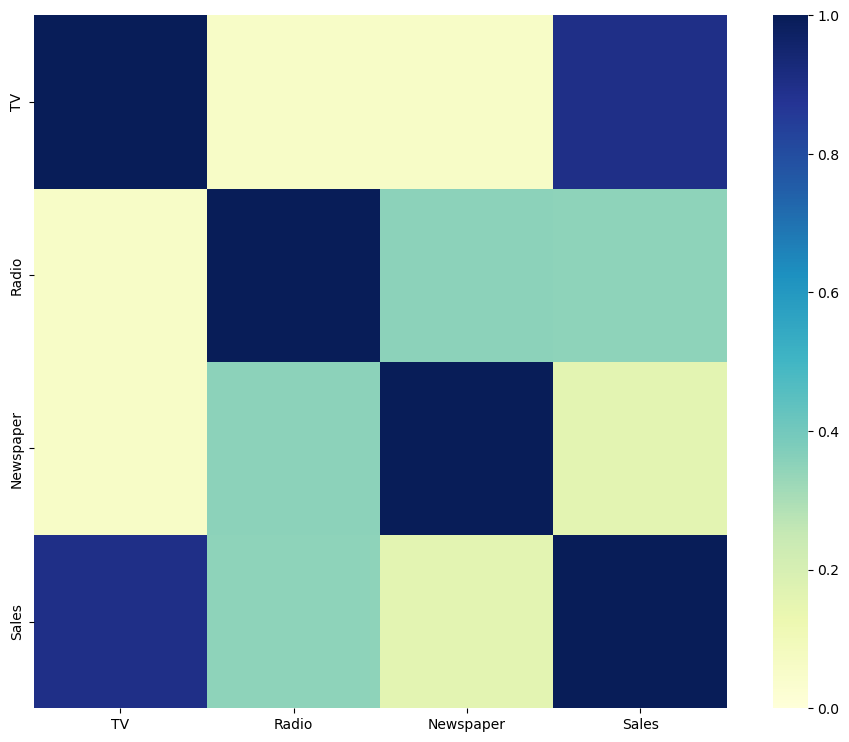

In [30]:
# sns.heatmap(df.corr(),annot=True)
# plt.show()
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap="YlGnBu", ax=ax)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
X = data.drop('Sales', axis=1)
y = data[["Sales"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [44]:
print(X_train)

        TV  Radio  Newspaper
121   18.8   21.7       50.4
170   50.0   11.6       18.4
97   184.9   21.0       22.0
197  177.0    9.3        6.4
85   193.2   18.4       65.7
..     ...    ...        ...
186  139.5    2.1       26.6
116  139.2   14.3       25.6
40   202.5   22.3       31.6
69   216.8   43.9       27.2
189   18.7   12.1       23.4

[160 rows x 3 columns]


In [46]:
print(y_train)

     Sales
121    7.0
170    8.4
97    20.5
197   14.8
85    20.2
..     ...
186   10.3
116   12.2
40    16.6
69    22.3
189    6.7

[160 rows x 1 columns]


In [50]:
print(X_test)

        TV  Radio  Newspaper
123  123.1   34.6       12.4
37    74.7   49.4       45.7
4    180.8   10.8       58.4
138   43.0   25.9       20.5
17   281.4   39.6       55.8
145  140.3    1.9        9.0
177  170.2    7.8       35.2
90   134.3    4.9        9.3
83    68.4   44.5       35.6
110  225.8    8.2       56.5
134   36.9   38.6       65.6
111  241.7   38.0       23.2
8      8.6    2.1        1.0
169  284.3   10.6        6.4
25   262.9    3.5       19.5
51   100.4    9.6        3.6
151  121.0    8.4       48.7
12    23.8   35.1       65.9
106   25.0   11.0       29.7
113  209.6   20.6       10.7
157  149.8    1.3       24.3
95   163.3   31.6       52.9
91    28.6    1.5       33.0
62   239.3   15.5       27.3
78     5.4   29.9        9.4
74   213.4   24.6       13.1
26   142.9   29.3       12.6
5      8.7   48.9       75.0
165  234.5    3.4       84.8
52   216.4   41.7       39.6
24    62.3   12.6       18.3
194  149.7   35.6        6.0
153  171.3   39.7       37.7
181  218.5    

In [52]:
print(y_test)

     Sales
123   15.2
37    14.7
4     17.9
138    9.6
17    24.4
145   10.3
177   16.7
90    14.0
83    13.6
110   18.4
134   10.8
111   21.8
8      4.8
169   20.0
25    17.0
51    10.7
151   11.6
12     9.2
106    7.2
113   20.9
157   10.1
95    16.9
91     7.3
62    20.7
78     5.3
74    17.0
26    15.0
5      7.2
165   16.9
52    22.6
24     9.7
194   17.3
153   16.0
181   17.2
70    18.3
103   19.7
43    17.9
27    20.9
10    12.6
96    16.7


In [54]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [58]:
res=model.predict(X_test)
print(res)

[[15.07294231]
 [14.13482906]
 [15.54770349]
 [ 9.80257243]
 [24.16020643]
 [12.35584497]
 [14.63265799]
 [12.36740411]
 [13.24580393]
 [17.67637707]
 [10.91031231]
 [21.83213276]
 [ 5.29455166]
 [21.06389841]
 [19.12954398]
 [11.06549069]
 [12.0612176 ]
 [ 9.81664702]
 [ 7.18082366]
 [18.16358015]
 [12.80717782]
 [16.91968032]
 [ 6.31844407]
 [19.20049263]
 [ 8.22121418]
 [18.81428585]
 [15.54743144]
 [10.5455235 ]
 [17.62349825]
 [20.89195217]
 [ 9.35848498]
 [16.61105608]
 [18.24399942]
 [16.95812041]
 [18.72592323]
 [16.62210044]
 [16.6680137 ]
 [19.37493735]
 [ 8.80867537]
 [15.61266285]]


In [60]:
model.coef_

array([[0.05375601, 0.11131643, 0.00048632]])

In [62]:
model.intercept_

array([4.59799919])

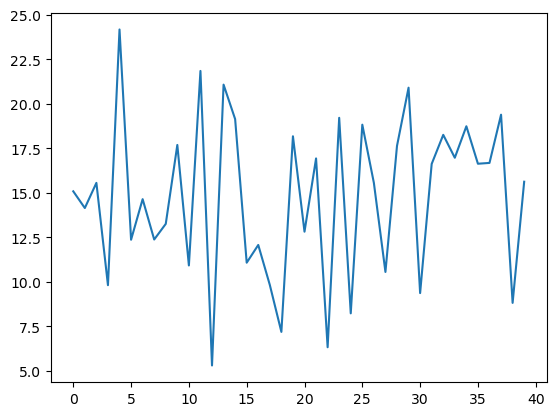

In [65]:
plt.plot(res)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_test and y_test are already defined
# Print shapes to check
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Ensure X_test and y_test have the same shape
if X_test.shape[0] != y_test.shape[0]:
    print("Shapes are different. Check your data preprocessing steps.")
else:
    # Convert X_test to a NumPy array if it's a DataFrame
    if isinstance(X_test, pd.DataFrame):
        X_test = X_test.values
    
    # Flatten X_test if it is a 2D array
    if X_test.ndim > 1:
        X_test = X_test.flatten()

    # Print shapes again after processing
    print("Shape of X_test after processing:", X_test.shape)
    print("Shape of y_test after processing:", y_test.shape)
    
    # Plotting
    plt.scatter(X_test, y_test)
    plt.plot(X_test, 7.14382225 + 0.05473199 * X_test, 'r')
    plt.show()


Shape of X_test: (120,)
Shape of y_test: (40, 1)
Shapes are different. Check your data preprocessing steps.


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load the dataset
df = pd.read_csv('advertising.csv')

# Define features and target
X = df.drop(columns='Sales')
y = df['Sales']

# Preprocessing pipelines for numerical data
numerical_features = ['TV', 'Radio', 'Newspaper']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(model, 'model.pkl')

['model.pkl']

In [13]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'